### Import libraries
Lets first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this project.

In [828]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Load Data From CSV File  
First we have to load the CSV file.

In [829]:
# Load Data
df = pd.read_csv("/content/Customer.csv")

## About the dataset
This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

## Clustering
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

## Data Exploration



In [830]:
# Let's look at the number of rows and columns in the data
df.shape

(200, 5)

In [831]:
# information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [832]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [833]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [834]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

## Data Preparation
1.   **Data validation:**
identify and remove anomalies and inconsistencies
  *   Incompleteness
  *   Inconsistency
  *   Outlier


2.   **Data integration and transformation:** Improve the acuracy and effiency of learning algorithms

  *   Data Transforamtion




In [835]:
# Incompleteness
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [836]:
# Inconsistency
for col in df.select_dtypes(include = "object"):
  print(df[col].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


#### **There is no Inconsistency in our data**




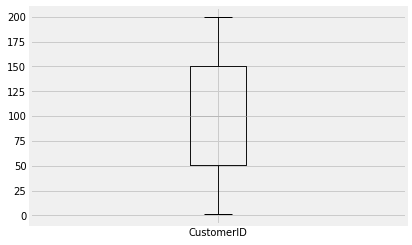

In [837]:
# outlier
df.boxplot("CustomerID")

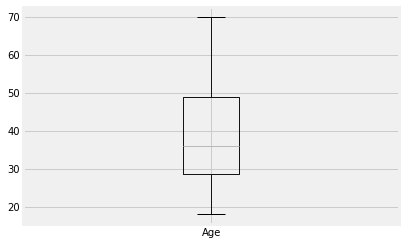

In [838]:
df.boxplot("Age")

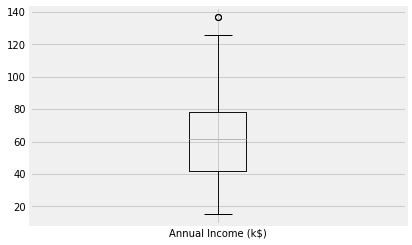

In [839]:
df.boxplot("Annual Income (k$)")

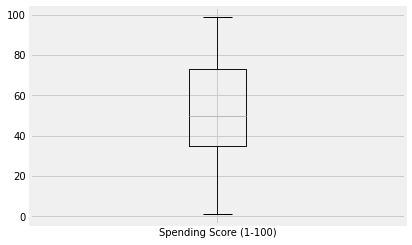

In [840]:
df.boxplot("Spending Score (1-100)")

#### **There is no Outlier in our data**

## Data Visualization
1.   Quantitive variables
  *   Histogram
  *   Scatter plot


2.  Categorical variables
  *   Count plot



In [841]:
# plot style
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



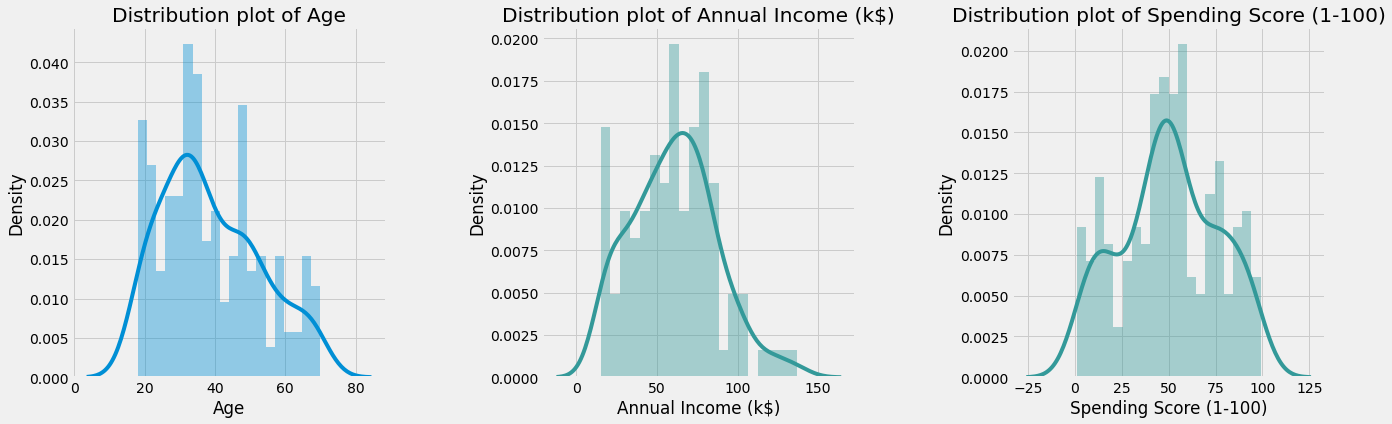

In [842]:
# Quantitive variables
# Histogram


plt.figure(1 , figsize = (20 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.set_palette(sns.hls_palette(h=.5, l=0.4, s=0.5))
    sns.distplot(df[x] , bins = 20)
    plt.title('Distribution plot of {}'.format(x))
plt.show()

**Ploting the Relation between Age , Annual Income and Spending Score**

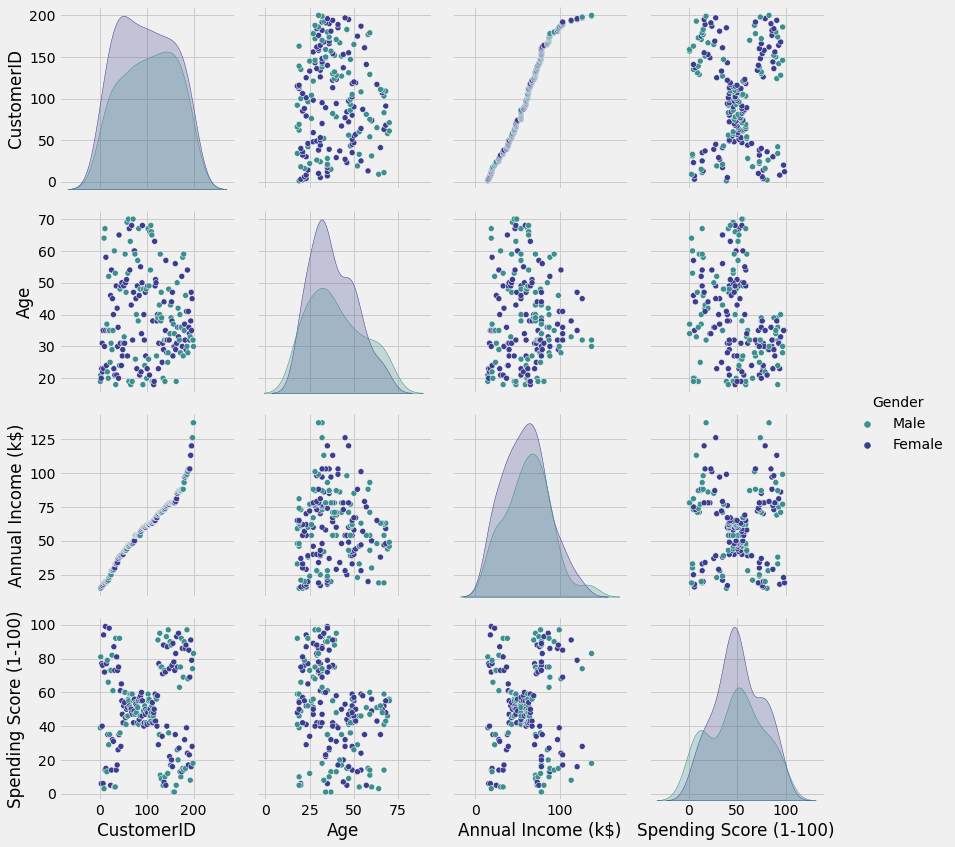

In [843]:
# Scatter plot
sns.set_palette(sns.hls_palette(h=.5, l=0.4, s=0.4))
sns.pairplot(df, hue="Gender", height=3)
plt.show()

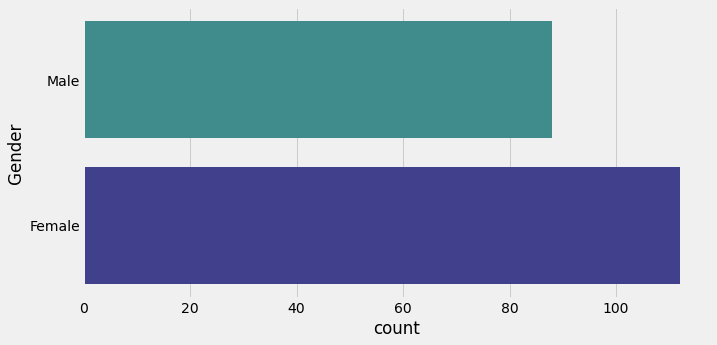

In [844]:
# Categorical variables
# countplot accroding to Gender

sns.set_palette(sns.hls_palette(h=.5, l=0.4, s=0.5))
plt.figure(1 , figsize = (10 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

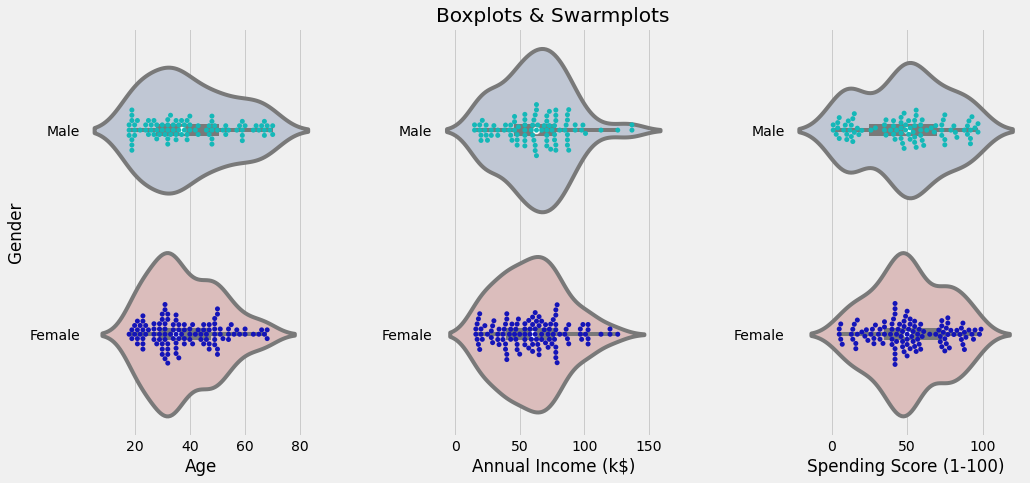

In [845]:
# Distribution of values in Age , Annual Income and Spending Score according to Gender

plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.set_palette(sns.hls_palette(h=.5, l=0.4, s=0.8))
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Clustering using K- means

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <\ul> 
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> 
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

#### **Normalizing over the standard deviation**
Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.
**Because the magnitudes of the features are equal, so we don't normalize data.**

### **Elbow Method**
Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

#### **1. Segmentation using Annual Income and Spending Score**

In [846]:
# Annual Income and spending Score
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    k_means = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    k_means.fit(X1)
    inertia.append(k_means.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



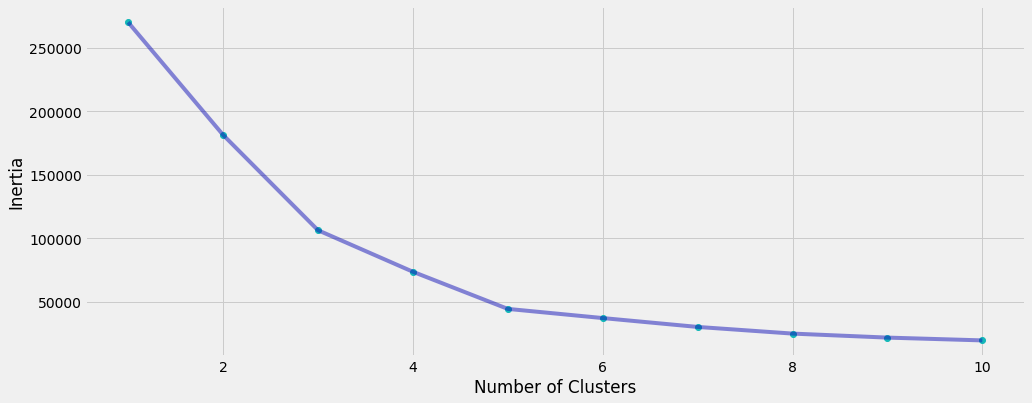

In [847]:
# Elbow method
# gives us an idea on what a good k number of clusters would be based on the sum of squared distance
plt.figure(1 , figsize = (15 ,6))                                 # Initialize the plot with the specified dimensions.
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Setting up K-Means
Now that we have our data, let's set up our K-Means clustering with number of cluster came from elbow method.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids in the pairplot. in this case it come from elbow method that run above. </li>
    <ul> <li> Value will be: 5 (since we have 5 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 10 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [848]:
k_means = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,         # Initialize KMeans with these parameters, where the output parameter is called k_means
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
k_means.fit(X1)                                                               # Now let's fit the KMeans model with the feature matrix we created above
k_means_labels = k_means.labels_                                                     # Now let's grab the labels for each point in the model using KMeans.lables_ attribute and save it as k_means_labels
k_means_centroids = k_means.cluster_centers_

In [849]:
# blend the regions of the cluster
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z1 = k_means.predict(np.c_[xx.ravel(), yy.ravel()]) 

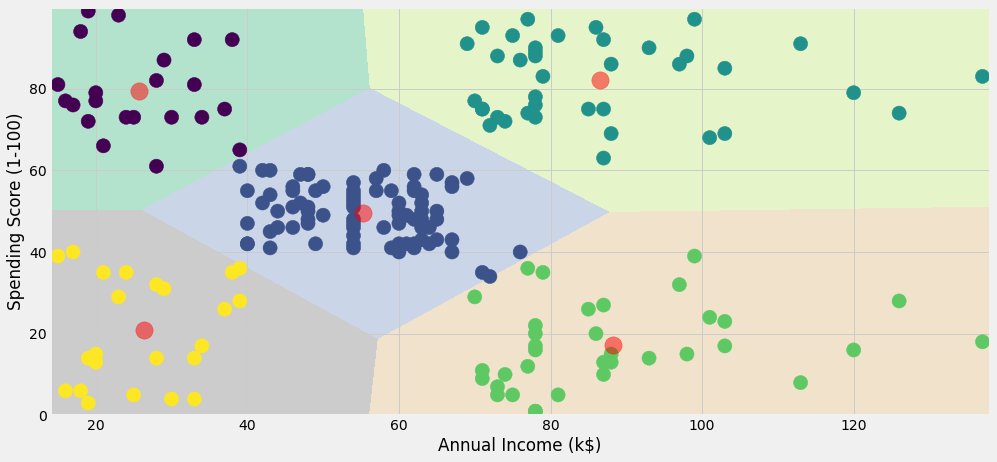

In [850]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z1 = Z1.reshape(xx.shape)
plt.imshow(Z1 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = k_means_labels , 
            s = 200 )
plt.scatter(x = k_means_centroids[: , 0] , y =  k_means_centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



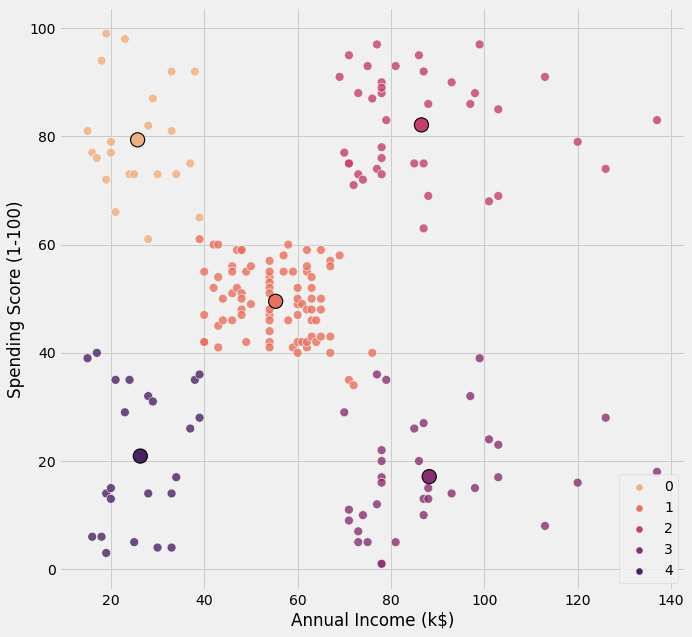

In [851]:
plt.figure(1 , figsize = (10 , 10))
ax = sns.scatterplot(X1[:, 0], X1[:, 1], hue=k_means.labels_, alpha=0.8, s=80, palette = "flare")      # Plots the datapoints with color col.
ax = sns.scatterplot(k_means_centroids[:, 0], k_means_centroids[:, 1],                                 # Define the centroid, or cluster center.
                     hue=range(5), s=200, ec='black', legend=False, ax=ax, palette = "flare")          # Plots the centroids with specified color, but with a darker outline
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

K-Means algorithm generated the following 5 clusters:

*   clients with **low annual income** and **high spending score**
* clients with **medium annual income** and **medium spending score**
* clients with **high annual income** and **low spending score**
* clients with **high annual income** and **high spending score**
* clients with **low annual income** and **low spending score**

There are no distinct groups is terms of customers age.


#### **2. Segmentation using Age and Spending Score**

In [852]:
# Age and spending Score
# Elbow method
X2 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    k_means = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    k_means.fit(X2)
    inertia.append(k_means.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



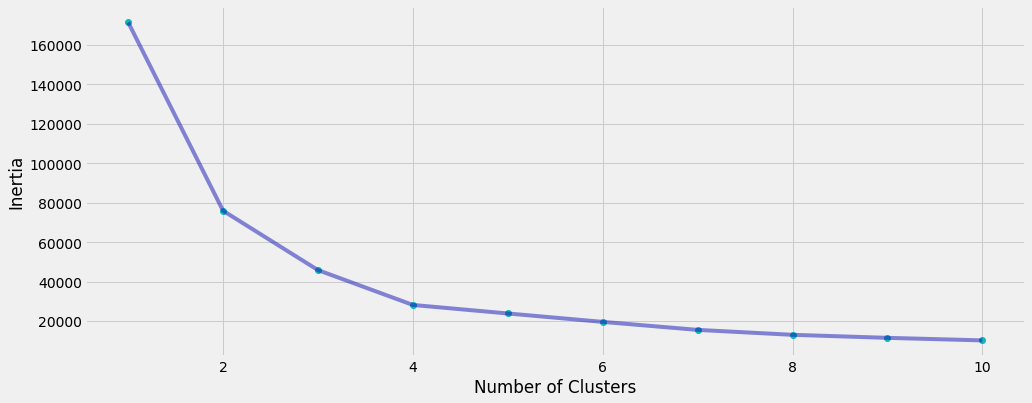

In [853]:
# Elbow method
# gives us an idea on what a good k number of clusters would be based on the sum of squared distance
plt.figure(1 , figsize = (15 ,6))                          # Initialize the plot with the specified dimensions.
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [854]:
k_means = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,         # Initialize KMeans with these parameters, where the output parameter is called k_means
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
k_means.fit(X2)                                                                      # Now let's fit the KMeans model with the feature matrix we created above
k_means_labels = k_means.labels_                                                     # Now let's grab the labels for each point in the model using KMeans.lables_ attribute and save it as k_means_labels
k_means_centroids = k_means.cluster_centers_

In [855]:
# Now let's visualize K-means clustering
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = k_means.predict(np.c_[xx.ravel(), yy.ravel()]) 

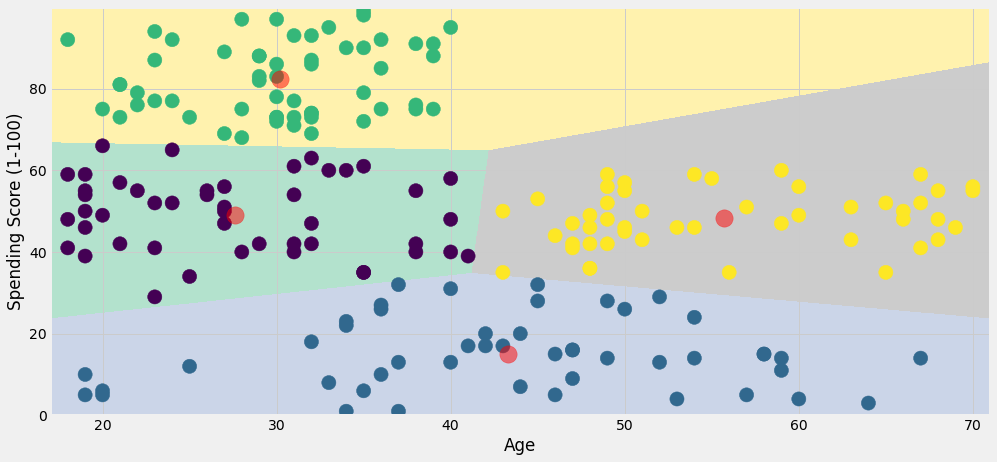

In [856]:
# Now let's visualize K-means clustering
plt.figure(1 , figsize = (15 , 7) )                                        # Initialize the plot with the specified dimensions.
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = k_means_labels ,                        # Plots the datapoints with color col.
            s = 200 )
plt.scatter(x = k_means_centroids[: , 0] , y =  k_means_centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)    # Plots the centroids with specified color (red)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



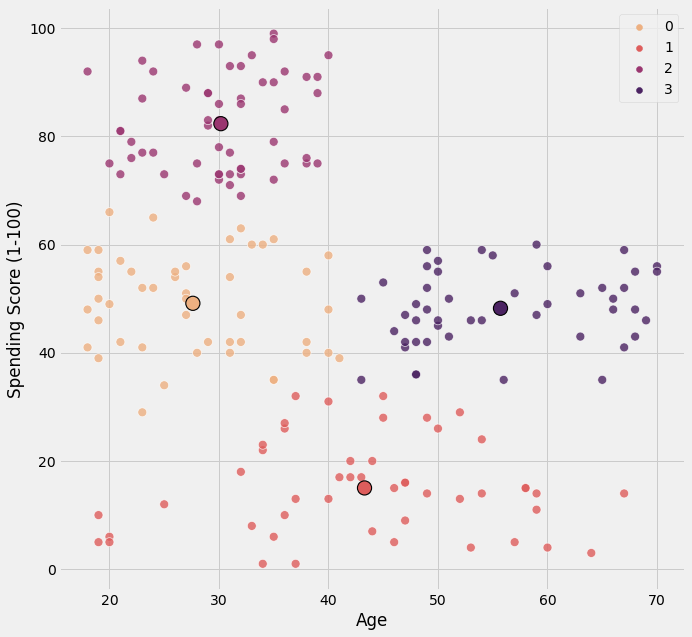

In [857]:
plt.figure(1 , figsize = (10 , 10))
ax = sns.scatterplot(X2[:, 0], X2[:, 1], hue=k_means.labels_, alpha=0.8, s=80, palette = "flare")      # Plots the datapoints with color col.
ax = sns.scatterplot(k_means_centroids[:, 0], k_means_centroids[:, 1],                                 # Define the centroid, or cluster center.
                     hue=range(4), s=200, ec='black', legend=False, ax=ax, palette = "flare")          # Plots the centroids with specified color, but with a darker outline
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

K-Means algorithm generated the following 4 clusters:

*   **young** clients with **high spending score**
* **young** clients with **medium spending score**
* **middle age** clients with **low spending score**
* **old** clients with **medium spending score**

There are no distinct groups is terms of customers age.

#### **3. Segmentation using CustomerID and Spending Score**

In [858]:
# CustomerID and spending Score
X3 = df[['CustomerID' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    k_means = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    k_means.fit(X3)
    inertia.append(k_means.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



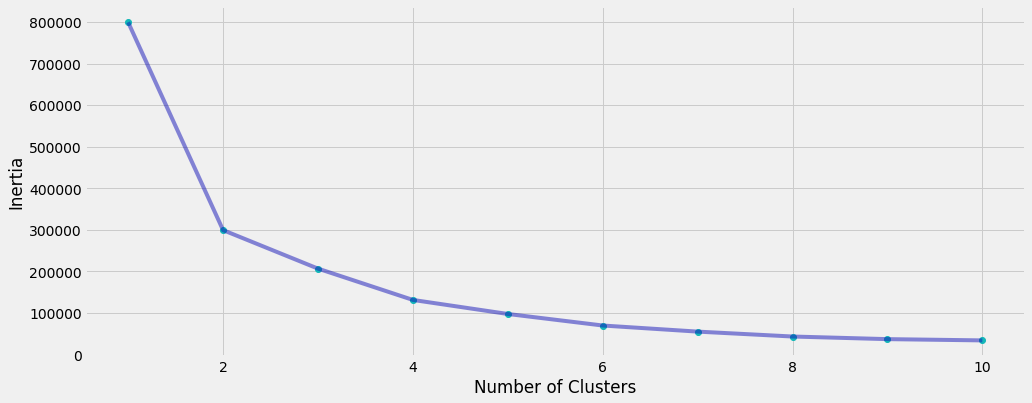

In [859]:
# Elbow method
# gives us an idea on what a good k number of clusters would be based on the sum of squared distance
plt.figure(1 , figsize = (15 ,6))                           # Initialize the plot with the specified dimensions.
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [860]:
k_means = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,         # Initialize KMeans with these parameters, where the output parameter is called k_means
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
k_means.fit(X3)                                                                      # Now let's fit the KMeans model with the feature matrix we created above
k_means_labels = k_means.labels_                                                     # Now let's grab the labels for each point in the model using KMeans.lables_ attribute and save it as k_means_labels
k_means_centroids = k_means.cluster_centers_

In [861]:
# Now let's visualize K-means clustering
h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = k_means.predict(np.c_[xx.ravel(), yy.ravel()]) 

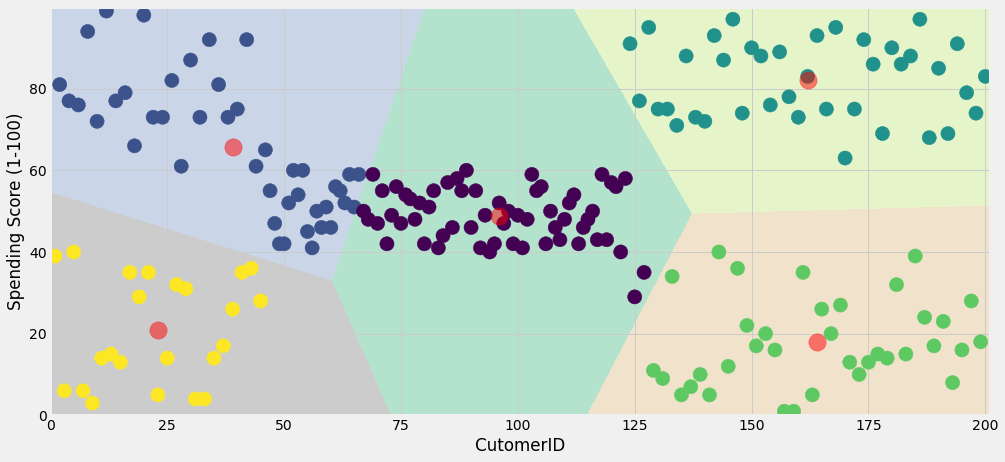

In [862]:
# Now let's visualize K-means clustering
plt.figure(1 , figsize = (15 , 7) )                                        # Initialize the plot with the specified dimensions.
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'CustomerID' ,y = 'Spending Score (1-100)' , data = df , c = k_means_labels ,                        # Plots the datapoints with color col.
            s = 200 )
plt.scatter(x = k_means_centroids[: , 0] , y =  k_means_centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)    # Plots the centroids with specified color (red)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('CutomerID')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



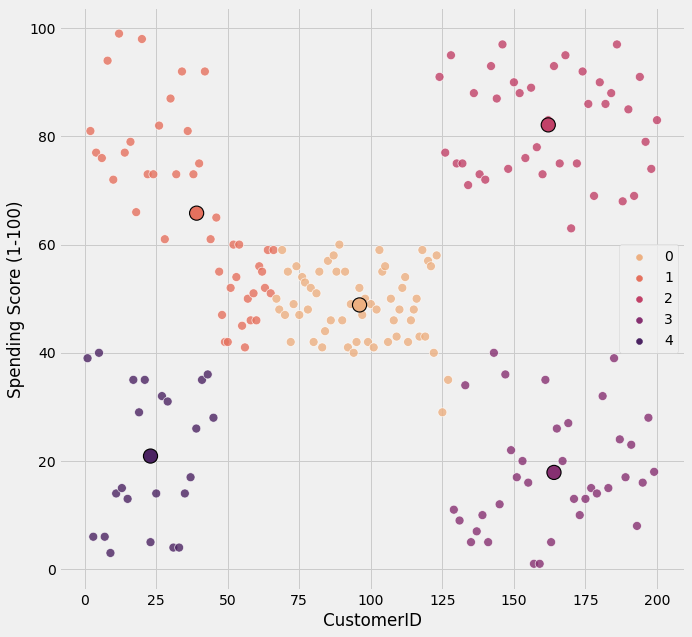

In [863]:
plt.figure(1 , figsize = (10 , 10))
ax = sns.scatterplot(X3[:, 0], X3[:, 1], hue=k_means.labels_, alpha=0.8, s=80, palette = "flare")      # Plots the datapoints with color col.
ax = sns.scatterplot(k_means_centroids[:, 0], k_means_centroids[:, 1],                              # Define the centroid, or cluster center.
                     hue=range(5), s=200, ec='black', legend=False, ax=ax, palette = "flare")          # Plots the centroids with specified color, but with a darker outline
plt.xlabel("CustomerID")
plt.ylabel("Spending Score (1-100)")
plt.show()

K-Means algorithm generated the following 5 clusters:

*   clients with **low CustomerID** and **high spending score**
* clients with **medium CustomerID** and **medium spending score**
* clients with **high CustomerID** and **low spending score**
* clients with **high CustomerID** and **high spending score**
* clients with **low CustomerID** and **low spending score**

However, CustomerID is not a good feature to clustering by.


#### **4. Segmentation using Age , Annual Income and Spending Score**

In [864]:
# Age with annual Income and Spending score
X4 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    k_means = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    k_means.fit(X4)
    inertia.append(k_means.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



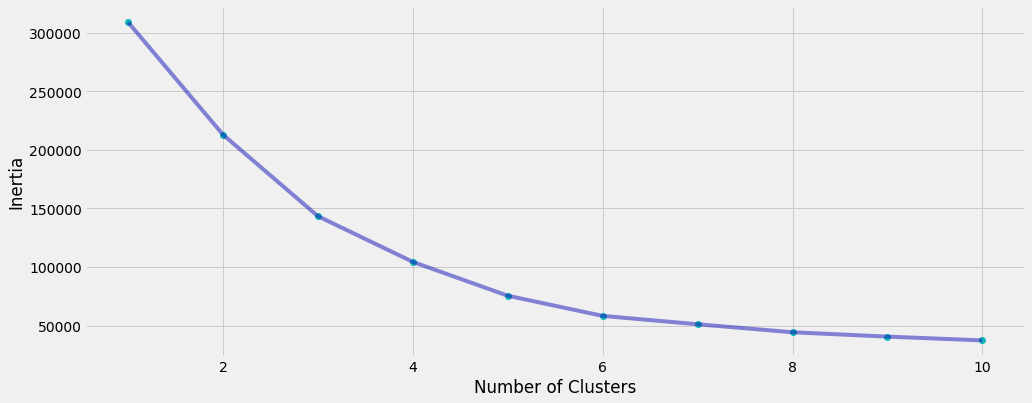

In [865]:
# Elbow method
# gives us an idea on what a good k number of clusters would be based on the sum of squared distance
plt.figure(1 , figsize = (15 ,6))                             # Initialize the plot with the specified dimensions.
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [866]:
k_means = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
k_means.fit(X4)
k_means_labels = k_means.labels_
k_means_centroids = k_means.cluster_centers_

In [867]:
# Now let's visualize K-means clustering in 3D shape
import plotly.graph_objs as go            # import libraries
import plotly as py                       # import libraries
df['k_means_labels'] =  k_means_labels
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['k_means_labels'], 
        size= 20,
        line=dict(
            color= df['k_means_labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(

    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<ipython-input-868-b09f09efc72e>:12: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



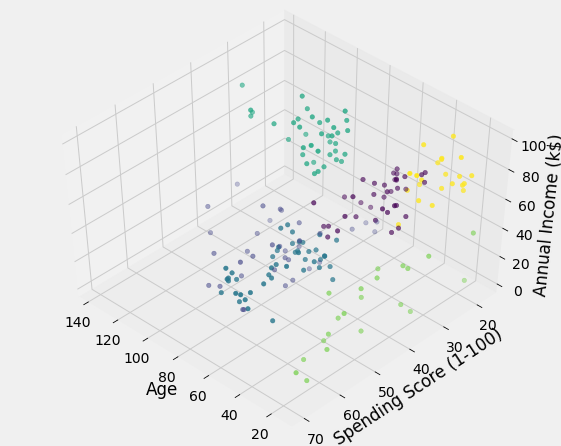

In [868]:
# Now let's visualize K-means clustering in 3D shape in another way
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel("Age")
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')

ax.scatter(X4[:, 1], X4[:, 0], X4[:, 2], c= k_means_labels.astype(np.float))

# Clustering using Hierarchical
<h1 id="hierarchical_agglomerative">Hierarchical Clustering - Agglomerative</h1>

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

We will be looking at another clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. agglomerative is the bottom up approach. <br> <br>
In this section, we will implement Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: we can also try using Average Linkage, ward's Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

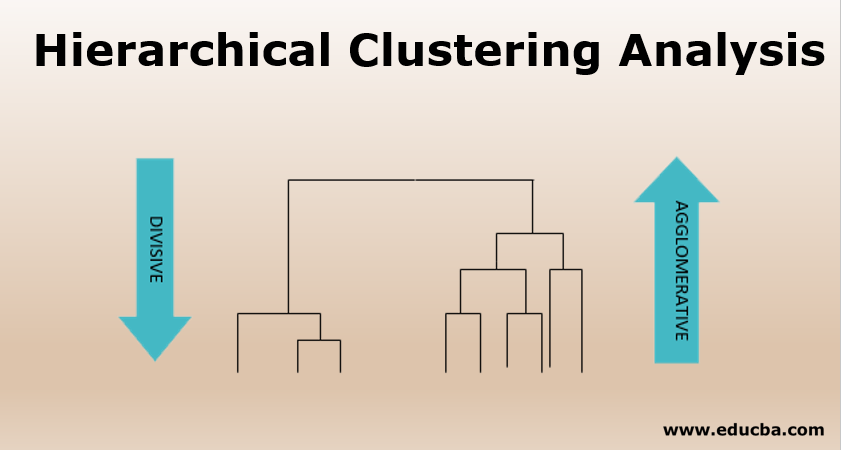

## Label Encoding
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated.

in this section we encode the Gender feature to 0, 1. 

In [869]:
# Import libraries
from sklearn import preprocessing
# create dataframe 1 to drop k_means_labels
df1 = df
# Encoding
label_encoder = preprocessing.LabelEncoder() 

df1["Gender"] = label_encoder.fit_transform(df1["Gender"])
# drop k_means_labels for Hierachical_labels
df1 = df1.drop("k_means_labels", axis = "columns")
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Heatmap
A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

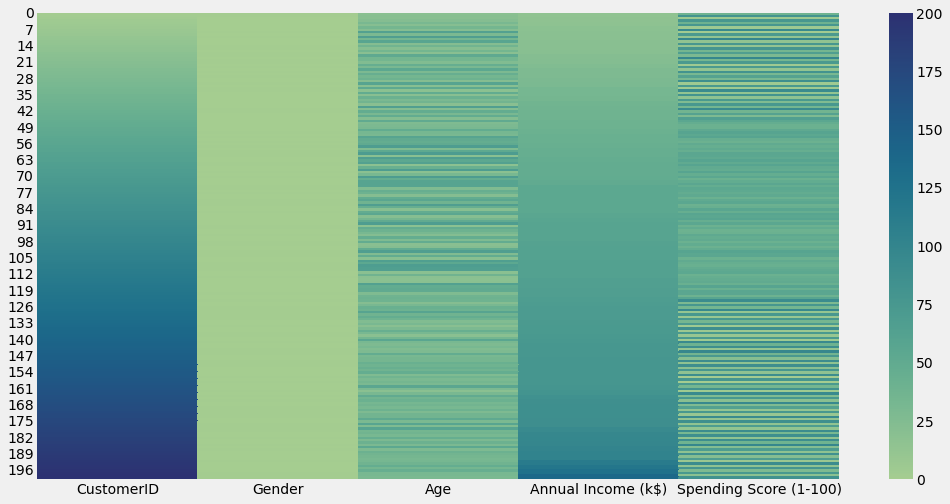

In [870]:
# Initialize the plot with the specified dimensions.
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df1, cmap = "crest")                # Plot rectangular data as a color-encoded matrix
plt.show()

## Clustermap
The clustermap() function of seaborn plots a hierarchically-clustered heat map of the given matrix dataset. It returns a clustered grid index

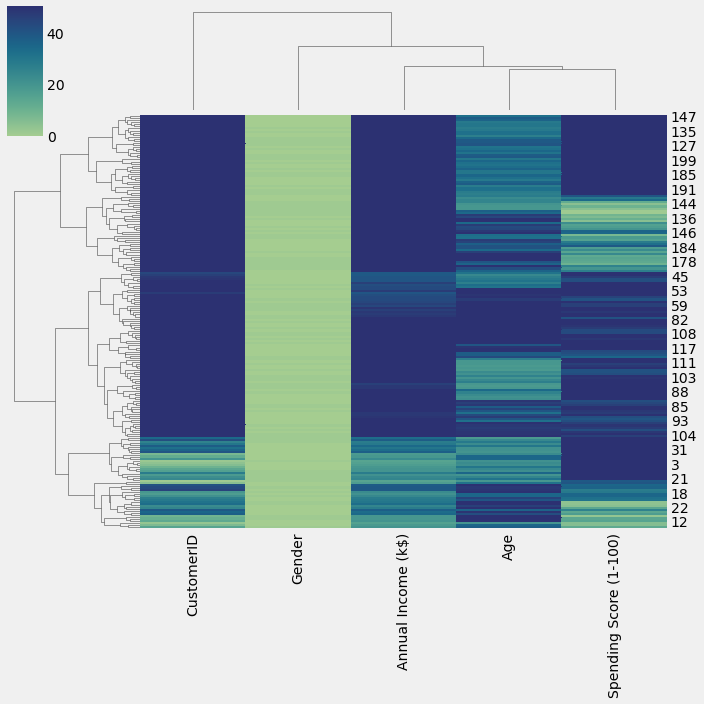

In [871]:
# plot heatmap and Dendrogram simultaneously
sns.clustermap(df1, cmap="crest", vmin=0, vmax=50)

## Dendrogram
A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts: in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses.

in this section we compare dendrogram of 3 linkage method.


*   Ward's Linkage
*   Complete Linkage
*   Average Linkage

**Note:** The default selection is ward’s linkage which works well on most datasets. and we use it in this project.



##### Ward's Linkage

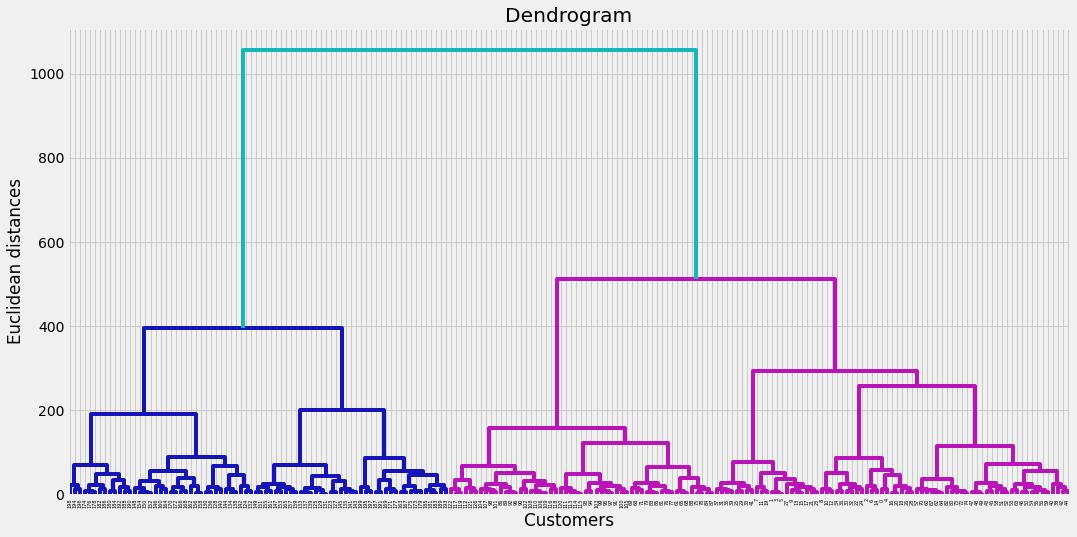

In [872]:
# Import libraries
import scipy.cluster.hierarchy as sch

# Initialize the plot with the specified dimensions.
plt.figure(1, figsize = (16 ,8))

# Implement dendrogram using scipy package 
dendrogram = sch.dendrogram(sch.linkage(df1, method  = "ward"))      # Using ward's linkage
                                                                    # It Minimizes the variance of the clusters being merged. Least increase in total variance around cluster centroids is aimed.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

##### compelete Linkage

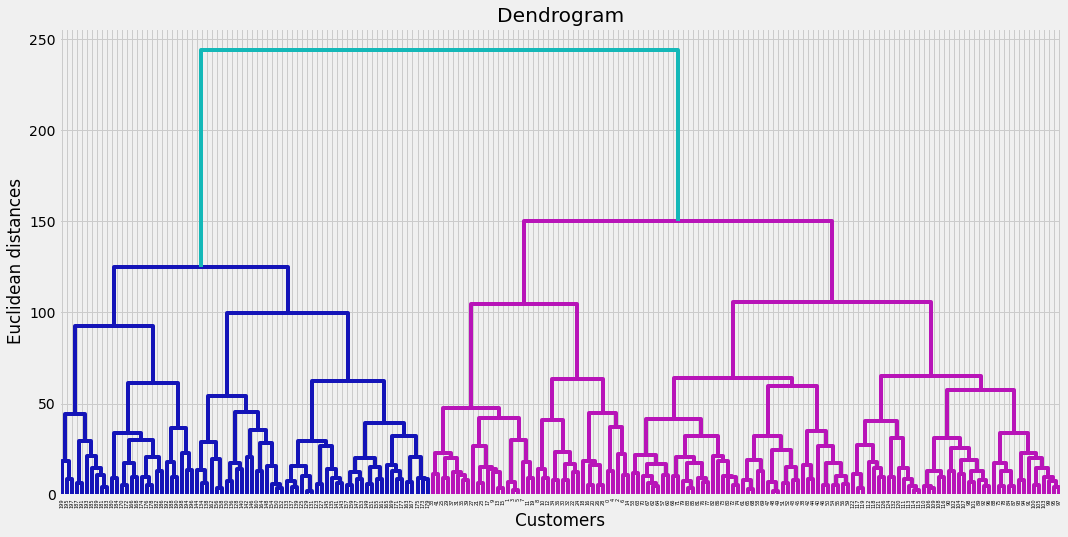

In [873]:
# Initialize the plot with the specified dimensions.
plt.figure(1, figsize = (16 ,8))

# Implement dendrogram using scipy package 
dendrogram = sch.dendrogram(sch.linkage(df1, method  = "complete"))      # Using Complete (maximum) linkage
                                                                    # Maximum distance among all data points in two clusters.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

##### Average Linkage

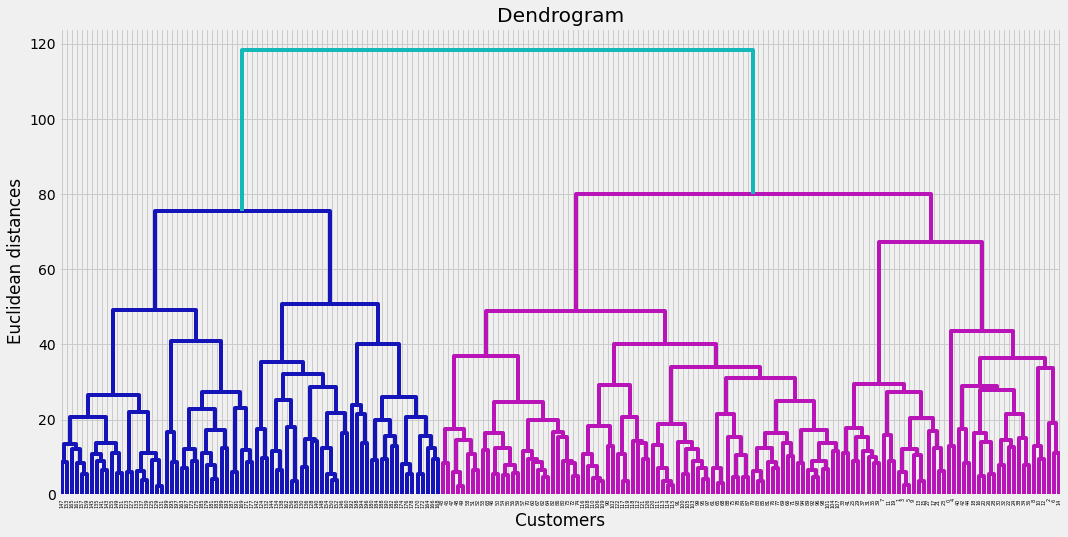

In [874]:
# Initialize the plot with the specified dimensions.
plt.figure(1, figsize = (16 ,8))

# Implement dendrogram using scipy package 
dendrogram = sch.dendrogram(sch.linkage(df1, method  = "average"))      # Using Complete (maximum) linkage
                                                                    # Maximum distance among all data points in two clusters.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## <hr>
<h3 id="agglomerative_clustering">Agglomerative Clustering</h3>

This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

We will start by clustering the Customers data.

The <b> Agglomerative Clustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 5 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'average' linkage </li> 
        <li> <b>Note</b>: In this project we clustering with 'ward', 'complete' and 'single' as well to compare all linkage methods. </li>
    </ul>
</ul> <br>

Save the result to a variable called <b> agglom </b>

#### **1. Segmentation using Annual Income and Spending Score**

In [875]:
# import libraries
from sklearn.cluster import AgglomerativeClustering 

# Implement the Hierachical clustering
agglom_ward = AgglomerativeClustering(n_clusters = 5, linkage = "ward")
agglom_average = AgglomerativeClustering(n_clusters = 5, linkage = "average")
agglom_complete = AgglomerativeClustering(n_clusters = 5, linkage = "complete")
agglom_single = AgglomerativeClustering(n_clusters = 5, linkage = "single")

In [876]:
X = df1[['Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

In [877]:
df1["Hierachical_labels_ward"] = agglom_ward.fit_predict(X)
df1["Hierachical_labels_average"] = agglom_average.fit_predict(X)
df1["Hierachical_labels_complete"] = agglom_complete.fit_predict(X)
df1["Hierachical_labels_single"] = agglom_single.fit_predict(X)

In [878]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Hierachical_labels_ward,Hierachical_labels_average,Hierachical_labels_complete,Hierachical_labels_single
0,1,1,19,15,39,4,1,4,1
1,2,1,21,15,81,3,3,3,1
2,3,0,20,16,6,4,1,4,1
3,4,0,23,16,77,3,3,3,1
4,5,0,31,17,40,4,1,4,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

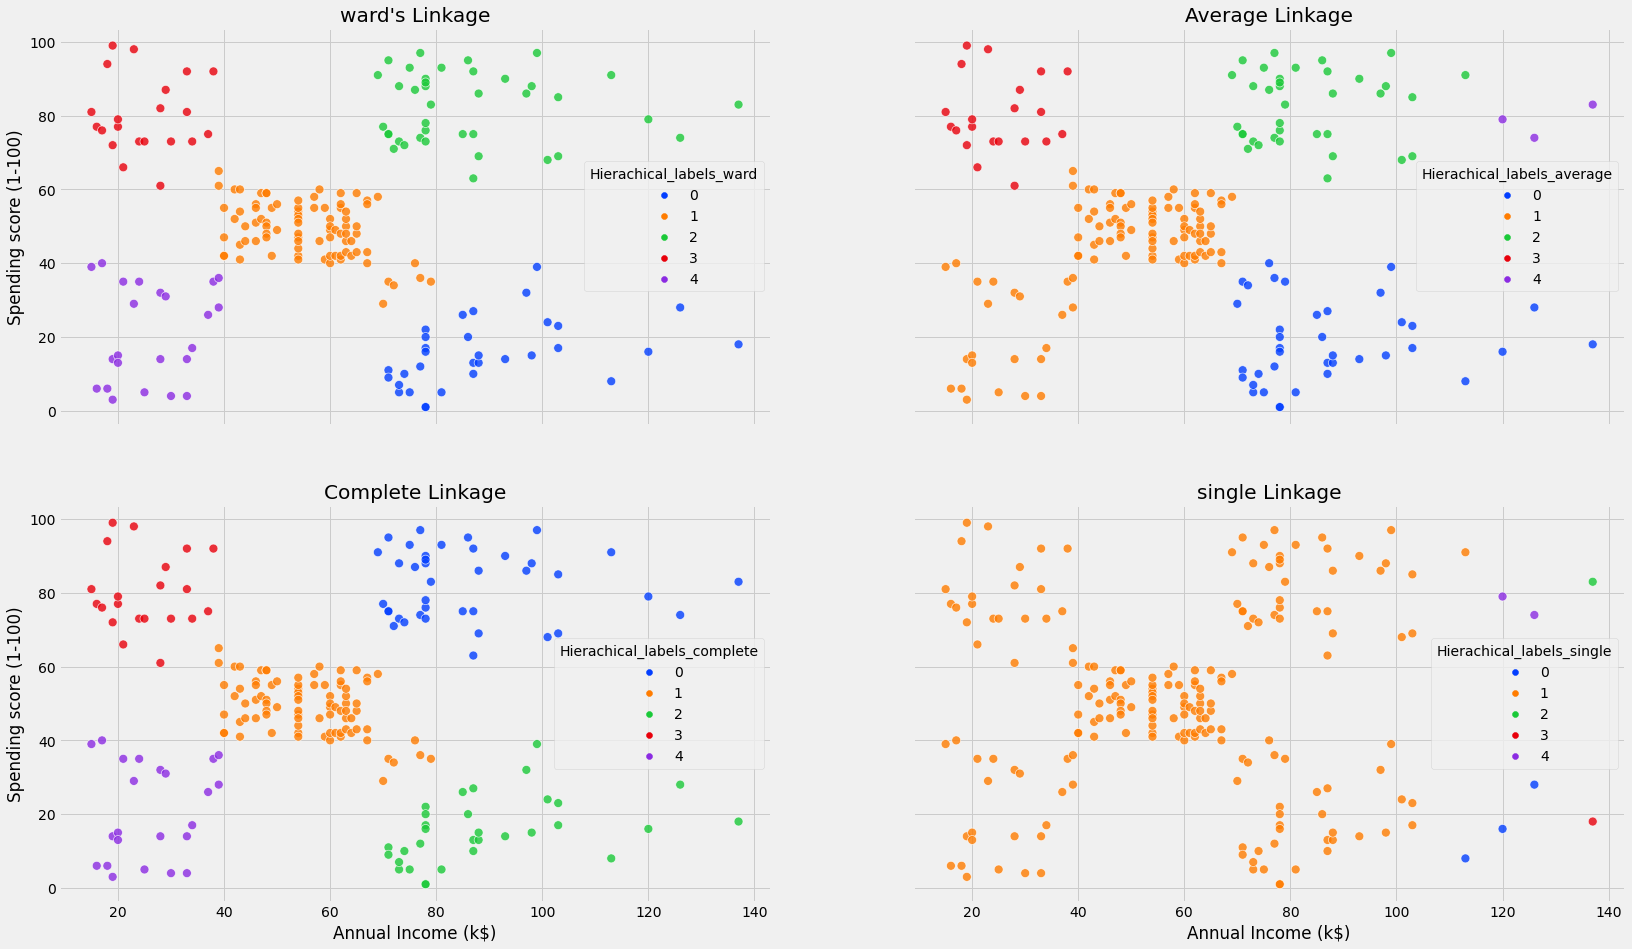

In [879]:
# clustering annual income vs spending score with all linkage methods
X1 = df1[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

# subplot the all linkage plots
fig, ax = plt.subplots(2, 2, figsize = (25, 15), sharex = True, sharey= True)

# ward linkage method plot
sns.scatterplot(X1[:, 0], X1[:, 1], hue=df1["Hierachical_labels_ward"], alpha=0.8, s=80, palette = sns.color_palette('bright', 5), ax = ax[0, 0])      # Plots the datapoints with color col.


# avergae linkage method plot 
sns.scatterplot(X1[:, 0], X1[:, 1], hue=df1["Hierachical_labels_average"], alpha=0.8, s=80, palette = sns.color_palette('bright', 5), ax = ax[0, 1])      # Plots the datapoints with color col.


# complete linkage method plot
sns.scatterplot(X1[:, 0], X1[:, 1], hue=df1["Hierachical_labels_complete"], alpha=0.8, s=80, palette = sns.color_palette('bright', 5), ax = ax[1, 0])      # Plots the datapoints with color col.


# single linkage method plot
sns.scatterplot(X1[:, 0], X1[:, 1], hue=df1["Hierachical_labels_single"], alpha=0.8, s=80, palette = sns.color_palette('bright', 5), ax = ax[1, 1])      # Plots the datapoints with color col.

# set labels
plt.setp(ax[-1, :], xlabel='Annual Income (k$)')
plt.setp(ax[:, 0], ylabel='Spending score (1-100)')
plt.setp(ax[0, 0],  title="ward's Linkage")
plt.setp(ax[0, 1],  title="Average Linkage")
plt.setp(ax[1, 0],  title="Complete Linkage")
plt.setp(ax[1, 1],  title="single Linkage")
plt.show()

**Note: as we see the plot above, we understand that best linkage method for this dataset is Complete and ward's linkage.**

It is obvious that we have 5 main clusters.
*  Cluster 1 (label 3)  - Low Income, Low Spending

*  Cluster 2 (label 4) - Low Income, High Spending
*  Cluster 3 (label 2) - Medium Income, Medium Spending
*  Cluster 4 (label 0) - High Income, Low Spending
*  Cluster 5 (lable 1) - High Income, High Spending

#### **2. Segmentation using Age and Spending Score**

In [880]:
# import libraries
from sklearn.cluster import AgglomerativeClustering 

# Implement the Hierachical clustering
agglom_ward = AgglomerativeClustering(n_clusters = 4, linkage = "ward")
agglom_average = AgglomerativeClustering(n_clusters = 4, linkage = "average")
agglom_complete = AgglomerativeClustering(n_clusters = 4, linkage = "complete")
agglom_single = AgglomerativeClustering(n_clusters = 4, linkage = "single")

In [881]:
X = df1[['Age' ,'Spending Score (1-100)']].iloc[: , :].values

In [882]:
df1["Hierachical_labels_ward"] = agglom_ward.fit_predict(X)
df1["Hierachical_labels_average"] = agglom_average.fit_predict(X)
df1["Hierachical_labels_complete"] = agglom_complete.fit_predict(X)
df1["Hierachical_labels_single"] = agglom_single.fit_predict(X)

In [883]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Hierachical_labels_ward,Hierachical_labels_average,Hierachical_labels_complete,Hierachical_labels_single
0,1,1,19,15,39,0,3,2,0
1,2,1,21,15,81,3,1,1,0
2,3,0,20,16,6,2,0,0,1
3,4,0,23,16,77,3,1,1,0
4,5,0,31,17,40,0,2,2,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

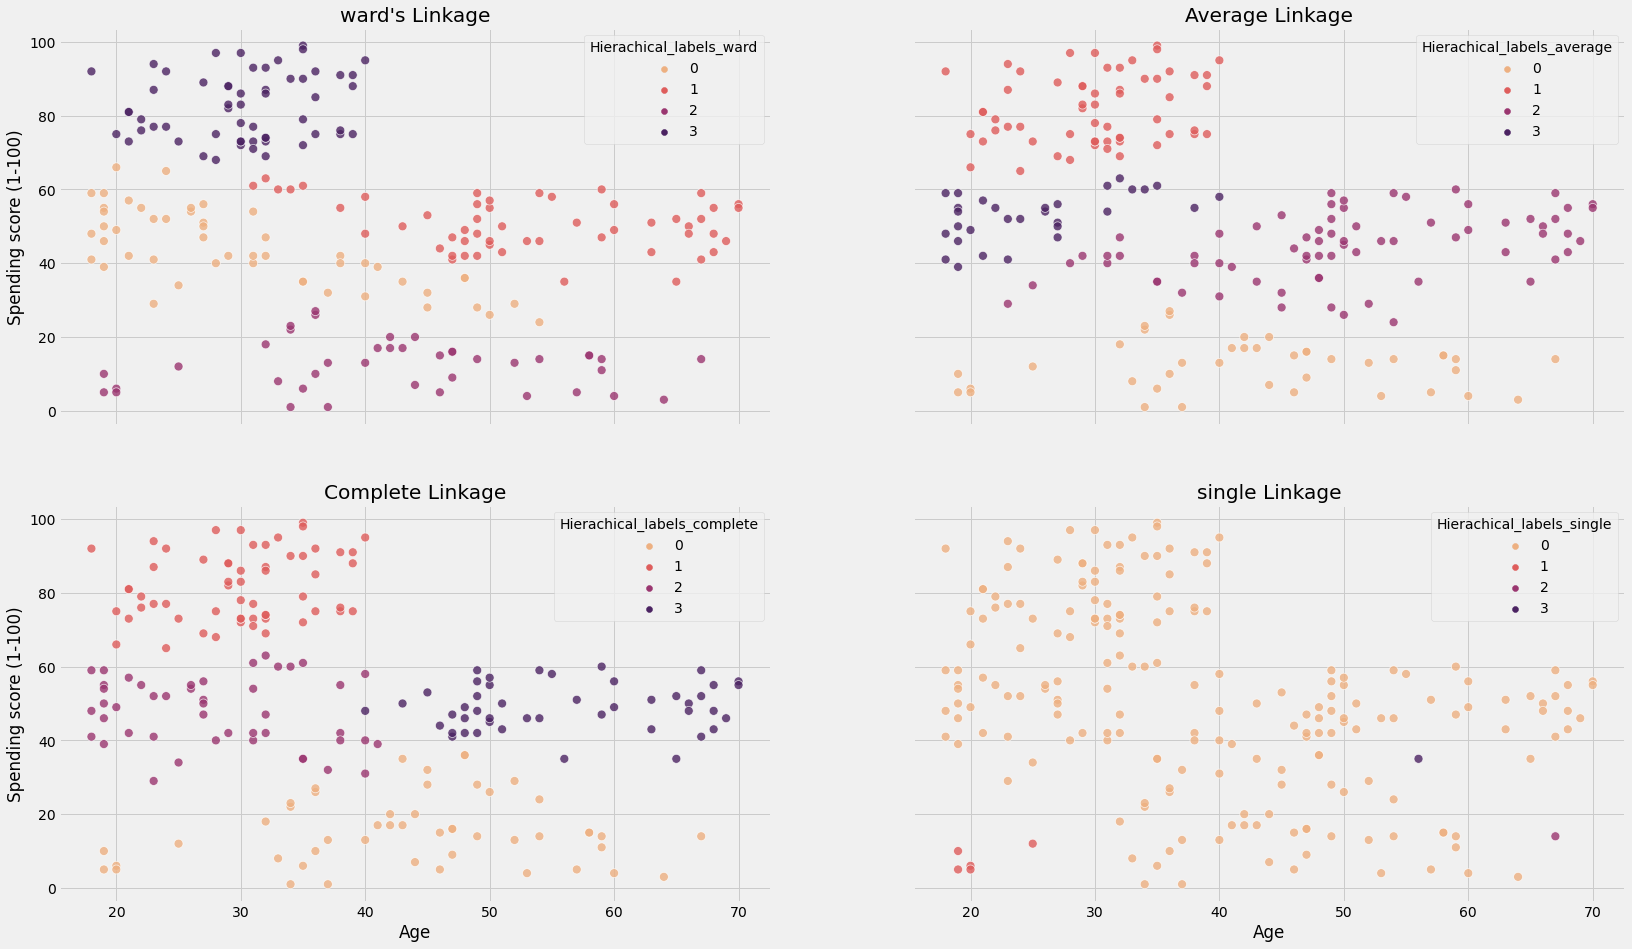

In [884]:
# clustering annual income vs spending score with all linkage methods
X1 = df1[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

# subplot the all linkage plots
fig, ax = plt.subplots(2, 2, figsize = (25, 15), sharex = True, sharey= True)

# ward linkage method plot
sns.scatterplot(X1[:, 0], X1[:, 1], hue=df1["Hierachical_labels_ward"], alpha=0.8, s=80, palette = "flare", ax = ax[0, 0])      # Plots the datapoints with color col.


# avergae linkage method plot 
sns.scatterplot(X1[:, 0], X1[:, 1], hue=df1["Hierachical_labels_average"], alpha=0.8, s=80, palette = "flare", ax = ax[0, 1])      # Plots the datapoints with color col.


# complete linkage method plot
sns.scatterplot(X1[:, 0], X1[:, 1], hue=df1["Hierachical_labels_complete"], alpha=0.8, s=80, palette = "flare", ax = ax[1, 0])      # Plots the datapoints with color col.


# single linkage method plot
sns.scatterplot(X1[:, 0], X1[:, 1], hue=df1["Hierachical_labels_single"], alpha=0.8, s=80, palette = "flare", ax = ax[1, 1])      # Plots the datapoints with color col.

# set labels
plt.setp(ax[-1, :], xlabel='Age')
plt.setp(ax[:, 0], ylabel='Spending score (1-100)')
plt.setp(ax[0, 0],  title="ward's Linkage")
plt.setp(ax[0, 1],  title="Average Linkage")
plt.setp(ax[1, 0],  title="Complete Linkage")
plt.setp(ax[1, 1],  title="single Linkage")
plt.show()

#### **3. Segmentation using Age , Annual Income and Spending Score**
we use Complete linkage method.

In [885]:
# Now let's visualize Hierachical clustering in 3D shape
trace1 = go.Scatter3d(
    x= df1['Age'],
    y= df1['Spending Score (1-100)'],
    z= df1['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df1['Hierachical_labels_complete'], 
        size= 10,
        line=dict(
            color= df1['Hierachical_labels_complete'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<ipython-input-886-482b67f4cd68>:13: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



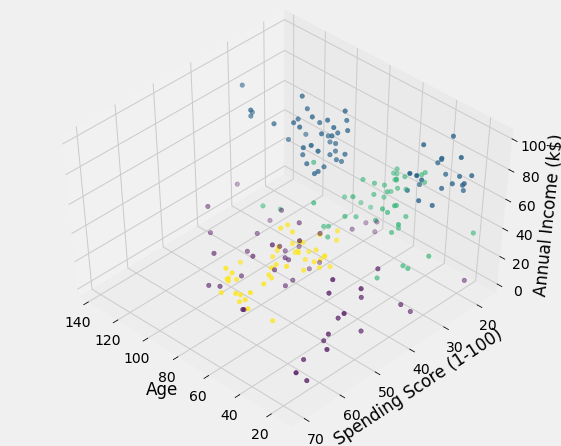

In [886]:
# Now let's visualize Hierachical clustering in 3D shape in another way
X2 = df1[['Age' ,'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel("Age")
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')

ax.scatter(X2[:, 1], X2[:, 0], X2[:, 2], c= df1["Hierachical_labels_complete"].astype(np.float))

# Clustering using DBSCAN

DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. 

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.



In this section, We are going to implement DBSCAN clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it.

Import the following libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> from <b>sklearn.cluster</b> </li>
</ul> <br>
Remember <b> %matplotlib inline </b> to display plots

In [887]:
# import libraries
from sklearn.cluster import DBSCAN

### Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
* __Epsilon__ determine a specified radius that if includes enough number of points within, we call it dense area  
* __minimumSamples__ determine the minimum number of data points we want in a neighborhood to define a cluster.

**It is difficult arbitrarily to say what values will work the best.**


#### **1. Segmentation using Annual Income and Spending Score**

In [888]:
df2 = df1.drop(["Hierachical_labels_ward","Hierachical_labels_average", "Hierachical_labels_complete", "Hierachical_labels_single"], axis = "columns" )
df2.head()
X = df2[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

In [889]:
# Cluster the data with epsilon 12 and minp 5
epsilon = 12
minimumSamples = 5
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,
       -1,  0,  2,  0, -1, -1,  2, -1, -1, -1, -1, -1, -1])

In [890]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [891]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [892]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

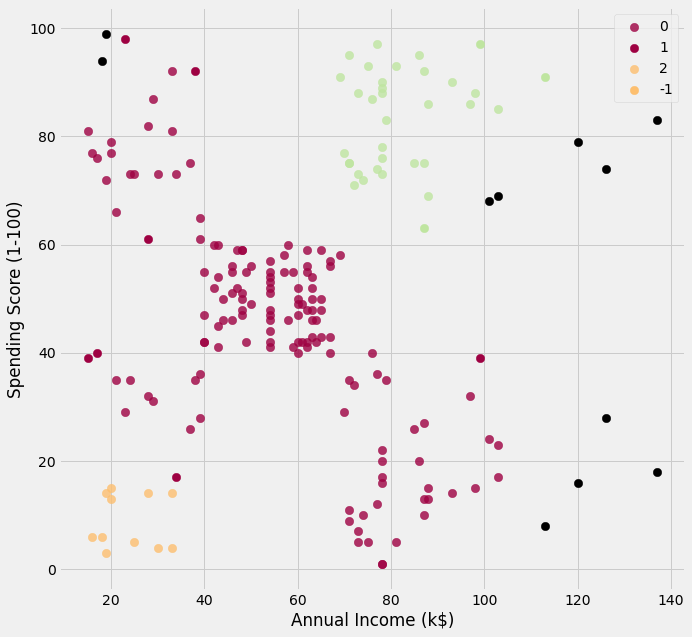

In [893]:
# define the dimension of the figure plot
plt.figure(1 , figsize = (10 , 10))

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=70, c=[col], marker=u'o', alpha=0.8, cmap = "plasma", vmin = 0, vmax= 0.100)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=70, c=[col], marker=u'o', alpha=1, cmap = "plasma", vmin =50, vmax = 100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(unique_labels)



It is obvious that we have 4 main clusters.
*  Cluster 1 (yellow)  - Low Income, Low Spending

*  Cluster 2 (red) - Medium Income, Medium Spending
*  Cluster 3 (black) - Outliers
*  Cluster 4 (Green) - High Income, High Spending

#### **2. Segmentation using Age and Spending Score**

In [894]:
X2 = df2[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

In [895]:
# Cluster the data with epsilon 12 and minp 5
epsilon = 6
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X2)
labels = db.labels_
labels

array([ 0,  1,  2,  1,  0,  1,  3,  1, -1,  1, -1,  1,  3,  1,  3,  1,  0,
        1,  0,  1,  0,  1,  3,  1,  3,  1,  0,  1,  0,  1, -1,  1, -1,  1,
        3,  1,  3,  1,  0,  1, -1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1, -1,  1,  0,  1,  3,  1,  3,  1, -1,  1,  2,  1,
        3,  1,  2,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  1,  3,  1,  3,
        1,  3,  1,  3,  1,  3,  1, -1,  1,  2,  1,  0,  1,  3,  1,  0,  1,
        3,  1,  3,  1,  3,  1,  3,  1,  3,  1,  0,  1,  3,  1,  0,  1,  0,
        1,  3,  1,  0,  1,  3,  1,  3,  1,  0,  1,  0,  1])

In [896]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,

In [897]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

4

In [898]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3}

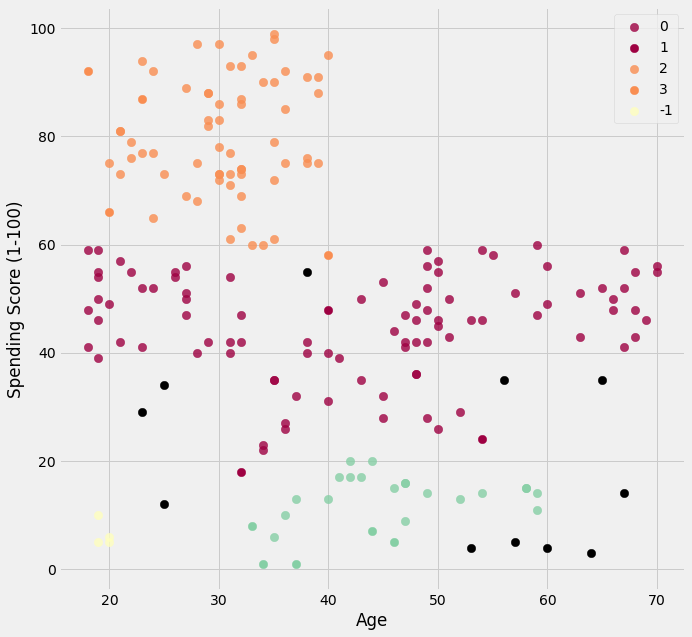

In [899]:
# define the dimension of the figure plot
plt.figure(1 , figsize = (10 , 10))

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X2[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=70, c=[col], marker=u'o', alpha=0.8, cmap = "plasma", vmin = 0, vmax= 0.100)

    # Plot the outliers
    xy = X2[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=70, c=[col], marker=u'o', alpha=1, cmap = "plasma", vmin =50, vmax = 100)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(unique_labels)